In [1]:
#@title Data retrieval
import os, requests
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

fname =['steinmetz_part0.npz', 'steinmetz_part1.npz', 'steinmetz_part2.npz']
#@title Data loading
import numpy as np


alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

In [2]:
for i in range(39):
    no = len(np.unique(alldat[i]['brain_area']))
#     print('%02d %02d' %(i,no)) # 07, 12__15

In [3]:
areas = np.unique(alldat[7]['brain_area'])
data = np.zeros((len(areas),250,250))

for i,area in enumerate(areas):
    index = np.where(alldat[7]['brain_area'] == area)[0]
    data[i] = np.mean(alldat[7]['spks'][index],axis=0)

In [193]:
trial1 = data[:,1,: 100].T
import pandas as pd

In [196]:
trial1 = pd.DataFrame(trial1,columns=areas)
a = trial1.corr()
a[a<0] = 0
a.replace(1, 0)

,CA1,CA3,DG,ILA,LD,LP,LSr,MOs,PL,PO,SUB,TT,VISa,VISp,root
CA1,0.000000,0.150985,0.000000,0.000000,0.000000,0.025901,0.000000,0.000000,0.000000,0.000000,0.156142,0.000000,0.084893,0.000000,0.000000
CA3,0.150985,0.000000,0.041812,0.000000,0.000000,0.025199,0.000000,0.000000,0.000000,0.000000,0.121015,0.000000,0.000000,0.000000,0.000000
DG,0.000000,0.041812,0.000000,0.000000,0.175247,0.000000,0.044286,0.074016,0.335685,0.073396,0.000000,0.000000,0.000000,0.000000,0.159070
ILA,0.000000,0.000000,0.000000,0.000000,0.040544,0.000000,0.000000,0.212670,0.199307,0.038798,0.057783,0.022251,0.000000,0.000000,0.000000
LD,0.000000,0.000000,0.175247,0.040544,0.000000,0.430277,0.000000,0.126187,0.007195,0.155776,0.031734,0.000000,0.267669,0.092154,0.002735
LP,0.025901,0.025199,0.000000,0.000000,0.430277,0.000000,0.000000,0.000000,0.000000,0.142824,0.000000,0.000000,0.001375,0.112085,0.000000
LSr,0.000000,0.000000,0.044286,0.000000,0.000000,0.000000,0.000000,0.000000,0.186446,0.000000,0.000000,0.037577,0.061340,0.011359,0.063553
MOs,0.000000,0.000000,0.074016,0.212670,0.126187,0.000000,0.000000,0.000000,0.093892,0.000000,0.118328,0.050030,0.096174,0.080522,0.000000
PL,0.000000,0.000000,0.335685,0.199307,0.007195,0.000000,0.186446,0.093892,0.000000,0.072867,0.061416,0.039018,0.000000,0.000000,0.121756
PO,0.000000,0.000000,0.073396,0.038798,0.155776,0.142824,0.000000,0.000000,0.072867,0.000000,0.088299,0.000000,0.227971,0.000000,0.146433


<AxesSubplot:>

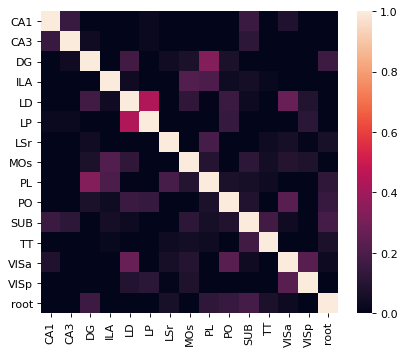

In [197]:
import seaborn
import networkx as nx
from networkx import from_numpy_array, draw_networkx, eigenvector_centrality, average_shortest_path_length, clustering, global_efficiency

from matplotlib.pyplot import figure
figure(figsize=(6, 5), dpi=80)


seaborn.heatmap(a)

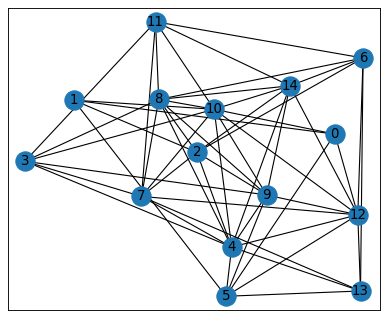

In [198]:
figure(figsize=(6, 5), dpi=80)
draw_networkx(from_numpy_array((np.array(a)), parallel_edges=False, create_using=nx.Graph))

In [245]:
li = list(eigenvector_centrality(from_numpy_array((np.array(a)), parallel_edges=False, create_using=nx.Graph)).items())
li

[(0, 0.12190621466063617),
 (1, 0.1163123112625618),
 (2, 0.2484478563258957),
 (3, 0.24018531751887595),
 (4, 0.3533242140188416),
 (5, 0.1787049198162704),
 (6, 0.2061619528598284),
 (7, 0.288818001430989),
 (8, 0.3278364129501815),
 (9, 0.29966005450569405),
 (10, 0.3371500052264872),
 (11, 0.223253063979955),
 (12, 0.29666091911293674),
 (13, 0.1737272461902641),
 (14, 0.30088068092570863)]

In [222]:
L = []
for idx in range (250):
    each_trial = data[:,idx,: 100].T
    each_trial = pd.DataFrame(each_trial,columns=areas)
    each_trial = each_trial.corr()
    each_trial[each_trial<0] = 0
    each_trial.replace(1, 0)
    L.append(each_trial)

In [223]:
all_matrix = np.array(L)
list_ei = []
# iterate graph analysis through each connectivity matrix and stores the result in a list

r = all_matrix.shape[0]
for idx in range(r): 
    list_ei.append(list(eigenvector_centrality(from_numpy_array(all_matrix[idx], parallel_edges=False, create_using=nx.Graph)).values()))

In [235]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
X = torch.tensor(list_ei)
Y = torch.tensor(alldat[7]['response'], dtype = torch.long)
Y[Y == 1 ] = 2
Y[Y == -1] = 1

In [236]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [237]:
# Create the data class

class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
        if (train):
            self.x = x_train
            self.y = y_train
            self.len = self.x.shape[0]
            
        else: 
            self.x = x_test
            selfy = y_test
        
    
    # Getter
    def __getitem__(self, index):      
        return self.x[index], self.y[index]
    
    # Get length
    def __len__(self):
        return self.len

In [238]:
train_set=Data()
test_set = Data(train = False)
train_loader = DataLoader(dataset=train_set, batch_size = 72)
test_loader = DataLoader(dataset=test_set, batch_size = 2)

In [239]:
# Create the neural network

class Net(nn.Module):
    
    def weights_init(m):
        if isinstance(m, torch.relu):
            torch.nn.init.kaiming_uniform_(m.weight.data)
            torch.nn.init.kaiming_uniform_(m.bias.data)
        elif isinstance(m, F.softmax):
            torch.nn.init.xavier_normal_(m.weight.data)
            torch.nn.init.xavier_normal_(m.bias.data)
        
        
    # Constructor
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, H3)
        self.linear4 = nn.Linear(H3, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = F.softmax(self.linear4(x))
        return x

In [240]:
# Define the function for training the model

LOSS = []  

def train(data_set, model, criterion, train_loader, optimizer, epochs):
    for epoch in range(epochs):
        for x, y in train_loader:
            yhat = model(x.float())
            loss = criterion(yhat, y)
            #loss_val = criterion(model(val_dataset.x), val_dataset.y).item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
            #VAL.append(val.item)

In [241]:
D_in = 15
H1 = 100
H2 = 100
H3 = 100
D_out = 3


model = Net(D_in, H1, H2, H3, D_out)
#model.apply(initialize_weights)
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

<ipython-input-239-1f0a6e7f01a0>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.linear4(x))


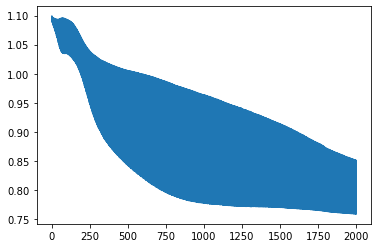

In [242]:
train(train_set, model, criterion, train_loader, optimizer, epochs= 500)
plt.plot(LOSS)

In [244]:
from sklearn.metrics import accuracy_score

pred = model(x_test)
_, predict_classes = torch.max(pred,1)

correct = accuracy_score(y_test, predict_classes)
print('Test Accuracy:', correct)

pred_2 = model(x_train)
_,predict_classes2 = torch.max(pred_2,1)

correct2 = accuracy_score(y_train, predict_classes2)
print('Train Accuracy:', correct2)

Test Accuracy: 0.56
Train Accuracy: 0.7422222222222222


<ipython-input-239-1f0a6e7f01a0>:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.linear4(x))
